<a href="https://colab.research.google.com/github/ahmadmardeni1/Stock-price-predection-using-Python/blob/main/stock_price_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [70]:
df = pd.read_csv('TSLA.csv')

### Prediction with a single value *univariate

In [71]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [72]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


Importing our model:

In [73]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [74]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)

In [75]:
dataset_test = scaler.transform(dataset_test)

In [76]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [77]:
x_train, y_train = create_dataset(dataset_train)

Creating our LSTM model:

In [78]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [79]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [80]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [81]:
model.fit(x_train, y_train, epochs=5, batch_size=32)
#model.fit(x_train, y_train, epochs=50, batch_size=32) #The model is trained for 50 epochs, but do it for 5 to speedup
#model.save('stock_prediction.h5')

Epoch 1/5
59/59 [==============================] - 15s 124ms/step - loss: 0.0427
Epoch 2/5
59/59 [==============================] - 7s 121ms/step - loss: 0.0038
Epoch 3/5
59/59 [==============================] - 8s 132ms/step - loss: 0.0039
Epoch 4/5
59/59 [==============================] - 8s 142ms/step - loss: 0.0033
Epoch 5/5
59/59 [==============================] - 8s 135ms/step - loss: 0.0035


In [82]:
model = load_model('stock_prediction.h5')

### Inference with the entire test data set

In [93]:
x_test, y_test = create_dataset(dataset_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

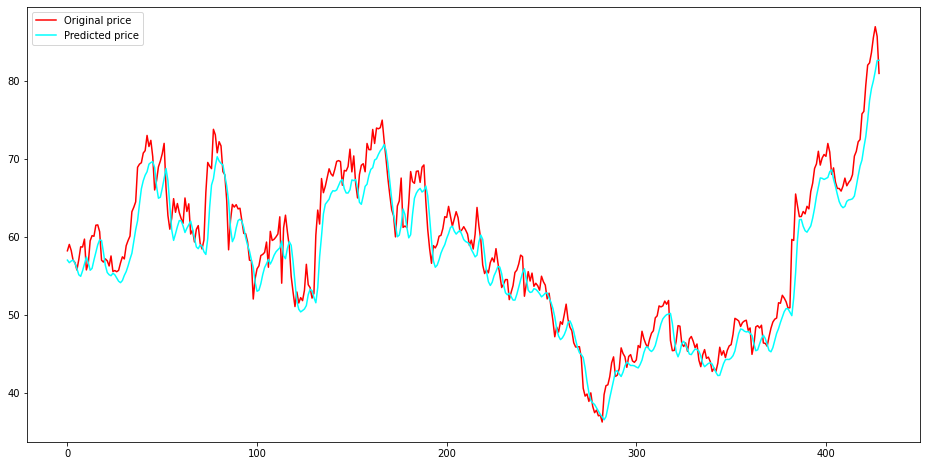

In [95]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test_raw.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

### Inference with a stream of data point

In [96]:
inference_stream = dataset_test

The stream of datapoint for inference are in the dataset_test. 

In [85]:
inference_stream.shape

(479, 1)

The LSTM model read 50 datapoints and predicts the next steps. So simulate this, we read 50 data points from the inference stream and create the infernence-object that will be input to the LSTM model

In [86]:
x_infer = inference_stream[0:50]
x_infer = np.array(x_infer)
print (x_infer.shape)

(50, 1)


Convert the inference_object 'x_infer' to have the correct shape.

In [87]:
x_infer = np.reshape(x_infer, (1, 50, 1))

Call the model predict on the 

In [88]:
prediction = model.predict(x_infer)
prediction = scaler.inverse_transform(prediction)

In [89]:
print(f"The prediction for the firsat 50 datapoints is {prediction}")

The prediction for the firsat 50 datapoints is [[57.01836]]


Now, make prediction with a stream of data

In [90]:
for i in range(50, len(inference_stream)):
    x_infer = inference_stream[i-50: i]
    x_infer = np.array(x_infer)
    x_infer = np.reshape(x_infer, (1, 50, 1))
    prediction = model.predict(x_infer)
    prediction = scaler.inverse_transform(prediction)